In [1]:
#Installing required packages

#!pip install WordNet
#!pip install torch
#!pip install spacy
#!pip install -U spacy 
#pip install transformers
#!python -m spacy download en_core_web_sm

#importing required libraries

import pandas as pd
import numpy as np 
import nltk
import re
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns


#  Preprocesssing textual data

from nltk import word_tokenize, pos_tag
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 1000)

# additional nltk resources

nltk.download('stopwords')
nltk.download('lemmatizer')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

# Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer


# Check Performance
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading lemmatizer: Package 'lemmatizer' not found
[nltk_data]     in index
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\U

In [2]:
# Importing required data AND Overview
data = pd.read_csv(r"C:\Users\sukan\ipba\Balenciaga_Reddit.csv")
data.head(25)

,Unnamed: 0,Comment ID,Parent ID,Author,Text,Score,Created,Likes
0,0,j88ymqt,t3_110fvn8,A_cim,nice budget haul...crazy finds for that price,28,1.676216e+09,NaN
1,1,j89ou87,t3_110fvn8,Former_Bite4274,Man is de budget manace,21,1.676226e+09,NaN
2,2,j88veb6,t3_110fvn8,perryske,Lekkere haul man!,7,1.676214e+09,NaN
3,3,j8907u9,t3_110fvn8,YoBrisky,Oh wait no way the shoes have been taken down,5,1.676216e+09,NaN
4,4,j88w5ca,t3_110fvn8,jokingaround91477,Nice definitely copping,4,1.676215e+09,NaN
5,5,j89r0ox,t3_110fvn8,ClassicWoodpecker,"The Gucci shirt ain’t fantasy, right?",5,1.676227e+09,NaN
6,6,j89028r,t3_110fvn8,YoBrisky,"My guy I was just trying to hunt down hyper royal, when you say fit big but TTS do you mean that they match size chart but just was big on you ? Also did anyone qc them for you ? Thanks",3,1.676216e+09,NaN
7,7,j8aw31f,t3_110fvn8,Annonyman1,What is the material like on the gucci shirt?,2,1.676244e+09,NaN
8,8,j8cfuco,t3_110fvn8,hastric,u are the 🐐,2,1.676272e+09,NaN
9,9,j8clbit,t3_110fvn8,tedimoya,Can the Gucci shirt be worn under a suit?,2,1.676277e+09,NaN


In [3]:
data.shape

(35749, 8)

In [4]:
# Changing name of 'text' column to 'Comments' column
data.rename(columns = {'Text':'Comments'}, inplace = True)
# removing columns

data = data.drop(['Unnamed: 0','Comment ID','Parent ID','Author','Score','Created','Likes'], axis=1)
data = data[['Comments']][:4000]

In [5]:
data['Comments'] =data['Comments'].astype(str)

In [6]:
data.head()

,Comments
0,nice budget haul...crazy finds for that price
1,Man is de budget manace
2,Lekkere haul man!
3,Oh wait no way the shoes have been taken down
4,Nice definitely copping


In [7]:
data.dtypes

Comments    object
dtype: object

In [8]:
data.shape

(4000, 1)

In [9]:
#### EDA- cleaning

In [10]:
# URLs removal and extra spaces too

data['Comments'] = data['Comments'].apply(lambda x: re.sub(r'https?\S+ðŸ˜žðŸ˜­ðŸ¤¬', '', x).strip())

In [11]:
##Remove punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [12]:
# Commit to Table
data['Comments'] = data['Comments'].apply(remove_punctuations)

In [13]:
# Convert to lower 
data['Comments']=data['Comments'].apply(lambda x: x.lower())

In [14]:
# Get Stopwords
stop = stopwords.words('english')

In [15]:
# Tokenize and Remove Stop Words
data['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

0                       [nice, budget, haulcrazy, finds, price]
1                                     [man, de, budget, manace]
2                                          [lekkere, haul, man]
3                                 [oh, wait, way, shoes, taken]
4                                   [nice, definitely, copping]
                                 ...                           
3995                               [dude, don’t, look, good, 😂]
3996    [weird, ass, stooped, posture, giving, severe, anxiety]
3997                          [stand, like, hes, also, sitting]
3998                 [must, missed, something, people, burning]
3999                                              [bincealagas]
Name: Comments, Length: 4000, dtype: object

In [16]:
# Join the words back
data['Comments'] = data['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [17]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [18]:
# Commit to Table

data['Comments'] = data['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

In [19]:
# Instantiate the TweetTokenizer
tokenizer = TweetTokenizer()

# Define a function to tokenize a tweet
def tokenize_tweet(tweet):
    # Use the TweetTokenizer to tokenize the tweet
    tokens = tokenizer.tokenize(tweet)
    return tokens

# Apply the tokenization function to the 'Comments' column
data['Tokens'] = data['Comments'].apply(tokenize_tweet)

In [20]:
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Return the tagged tokens
    return tagged_tokens

In [21]:
# Applying the POS tagging function to the 'Comments' column
data['POS_Tagged'] = data['Comments'].apply(pos_tagging)

In [22]:
data.head()

,Comments,Tokens,POS_Tagged
0,nice budget haulcrazy finds price,"[nice, budget, haulcrazy, finds, price]","[(nice, JJ), (budget, NN), (haulcrazy, NN), (finds, VBZ), (price, NN)]"
1,man de budget manace,"[man, de, budget, manace]","[(man, NN), (de, VBZ), (budget, NN), (manace, NN)]"
2,lekkere haul man,"[lekkere, haul, man]","[(lekkere, RB), (haul, NN), (man, NN)]"
3,oh wait way shoes taken,"[oh, wait, way, shoes, taken]","[(oh, UH), (wait, JJ), (way, NN), (shoes, NNS), (taken, VBN)]"
4,nice definitely copping,"[nice, definitely, copping]","[(nice, JJ), (definitely, RB), (copping, VBG)]"


In [23]:
####Creating models and using it on the dataset

In [24]:
###Analysing sentiments through vader

In [25]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = data['Comments'].apply(sid.polarity_scores)

In [26]:
data["vader_score"] = sentiment_scores.apply(lambda x: x['compound'])

In [27]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score
0,nice budget haulcrazy finds price,"[nice, budget, haulcrazy, finds, price]","[(nice, JJ), (budget, NN), (haulcrazy, NN), (finds, VBZ), (price, NN)]",0.4215
1,man de budget manace,"[man, de, budget, manace]","[(man, NN), (de, VBZ), (budget, NN), (manace, NN)]",0.0000
2,lekkere haul man,"[lekkere, haul, man]","[(lekkere, RB), (haul, NN), (man, NN)]",0.0000
3,oh wait way shoes taken,"[oh, wait, way, shoes, taken]","[(oh, UH), (wait, JJ), (way, NN), (shoes, NNS), (taken, VBN)]",0.0000
4,nice definitely copping,"[nice, definitely, copping]","[(nice, JJ), (definitely, RB), (copping, VBG)]",0.6705


In [28]:
count_total=0
count_pos=0
count_neg=0
#count_neut=0


for i in data["vader_score"]:
    if i >=0:
        count_pos=count_pos+1
    elif i <0:
        count_neg = count_neg +1
    else:
        0
        #count_neut = count_neut +1
        
 

print("positive tweets:",count_pos)
print("negative tweets:",count_neg)

conditions = [
    (data['vader_score'] >=0),
    (data['vader_score'] <0)]
    
choices = [1,0]
data['vader_sentiment'] = np.select(conditions, choices )

positive tweets: 3325
negative tweets: 675


In [29]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment
0,nice budget haulcrazy finds price,"[nice, budget, haulcrazy, finds, price]","[(nice, JJ), (budget, NN), (haulcrazy, NN), (finds, VBZ), (price, NN)]",0.4215,1
1,man de budget manace,"[man, de, budget, manace]","[(man, NN), (de, VBZ), (budget, NN), (manace, NN)]",0.0000,1
2,lekkere haul man,"[lekkere, haul, man]","[(lekkere, RB), (haul, NN), (man, NN)]",0.0000,1
3,oh wait way shoes taken,"[oh, wait, way, shoes, taken]","[(oh, UH), (wait, JJ), (way, NN), (shoes, NNS), (taken, VBN)]",0.0000,1
4,nice definitely copping,"[nice, definitely, copping]","[(nice, JJ), (definitely, RB), (copping, VBG)]",0.6705,1


In [30]:
for i in data['vader_sentiment']:
    if i == 1:
        lable= ("Positive")
    elif i ==0:
        lable= ("Negative")
    else:
        0

        
(data['vader_sentiment'] ==1),
(data['vader_sentiment'] ==0),

choices = ["Positive","Negative"]

data['vader_labels'] = np.select(conditions, choices )

In [31]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels
0,nice budget haulcrazy finds price,"[nice, budget, haulcrazy, finds, price]","[(nice, JJ), (budget, NN), (haulcrazy, NN), (finds, VBZ), (price, NN)]",0.4215,1,Positive
1,man de budget manace,"[man, de, budget, manace]","[(man, NN), (de, VBZ), (budget, NN), (manace, NN)]",0.0000,1,Positive
2,lekkere haul man,"[lekkere, haul, man]","[(lekkere, RB), (haul, NN), (man, NN)]",0.0000,1,Positive
3,oh wait way shoes taken,"[oh, wait, way, shoes, taken]","[(oh, UH), (wait, JJ), (way, NN), (shoes, NNS), (taken, VBN)]",0.0000,1,Positive
4,nice definitely copping,"[nice, definitely, copping]","[(nice, JJ), (definitely, RB), (copping, VBG)]",0.6705,1,Positive


<AxesSubplot:xlabel='vader_labels', ylabel='count'>

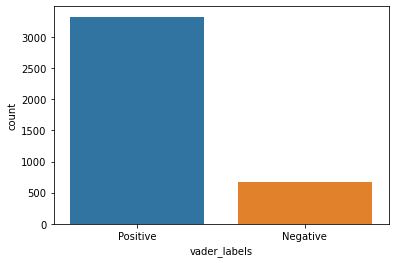

In [32]:
import seaborn as sns

sns.countplot(x='vader_labels', data=data)

Positive Sentiments


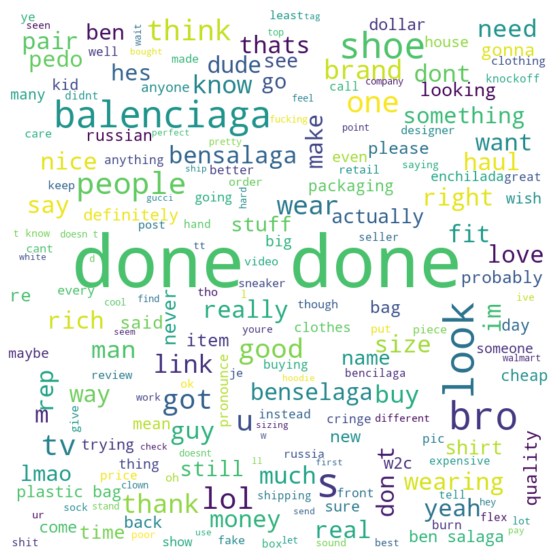

Negative Sentiments


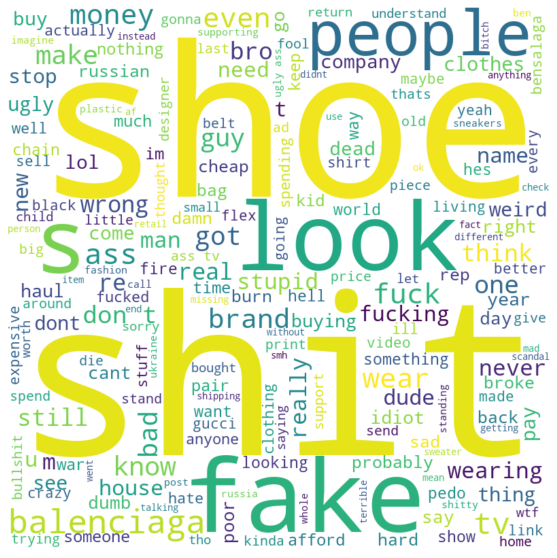

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['vader_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['vader_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [34]:
###Analysing sentiments through pretrained roBERTa

In [35]:
## Importing model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [36]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [37]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
# List of samples
samples = data['Comments'].tolist()

# List to store the scores for each sample
scores_list = []

# Calculate the scores for each sample and store in the scores_list
for sample in samples:
    encoded_text = tokenizer(sample, padding=True, truncation=True, max_length=128, return_tensors='pt')
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']
    output = model(input_ids=input_ids, attention_mask=attention_mask)
    scores = torch.softmax(output.logits, dim=1)
    scores_dict = {
        'roberta_neg' : scores[0][0].item(),  
        'roberta_pos' : scores[0][1].item()
    }
    scores_list.append(scores_dict)

# Create a pandas dataframe from the scores_list
scores_df = pd.DataFrame(scores_list)

# Concatenate the original data and scores_df dataframes horizontally
data = pd.concat([data, scores_df], axis=1)

# Print the updated dataframe
print(data)

                                             Comments  \
0                   nice budget haulcrazy finds price   
1                                man de budget manace   
2                                    lekkere haul man   
3                             oh wait way shoes taken   
4                             nice definitely copping   
...                                               ...   
3995                           dude don’t look good 😂   
3996  weird ass stooped posture giving severe anxiety   
3997                      stand like hes also sitting   
3998             must missed something people burning   
3999                                      bincealagas   

                                                       Tokens  \
0                     [nice, budget, haulcrazy, finds, price]   
1                                   [man, de, budget, manace]   
2                                        [lekkere, haul, man]   
3                               [oh, wait, way, shoes, 

In [38]:
data.head(15)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos
0,nice budget haulcrazy finds price,"[nice, budget, haulcrazy, finds, price]","[(nice, JJ), (budget, NN), (haulcrazy, NN), (finds, VBZ), (price, NN)]",0.4215,1,Positive,0.021757,0.225048
1,man de budget manace,"[man, de, budget, manace]","[(man, NN), (de, VBZ), (budget, NN), (manace, NN)]",0.0000,1,Positive,0.179297,0.716729
2,lekkere haul man,"[lekkere, haul, man]","[(lekkere, RB), (haul, NN), (man, NN)]",0.0000,1,Positive,0.214380,0.686910
3,oh wait way shoes taken,"[oh, wait, way, shoes, taken]","[(oh, UH), (wait, JJ), (way, NN), (shoes, NNS), (taken, VBN)]",0.0000,1,Positive,0.283471,0.686846
4,nice definitely copping,"[nice, definitely, copping]","[(nice, JJ), (definitely, RB), (copping, VBG)]",0.6705,1,Positive,0.007919,0.258702
5,gucci shirt ain’t fantasy right,"[gucci, shirt, ain, ’, t, fantasy, right]","[(gucci, NN), (shirt, NN), (ain, VBP), (’, JJ), (t, NN), (fantasy, NN), (right, NN)]",0.0000,1,Positive,0.668706,0.302505
6,guy trying hunt hyper royal say fit big tts mean match size chart big also anyone qc thanks,"[guy, trying, hunt, hyper, royal, say, fit, big, tts, mean, match, size, chart, big, also, anyone, qc, thanks]","[(guy, NN), (trying, VBG), (hunt, NN), (hyper, JJ), (royal, NNS), (say, VBP), (fit, JJ), (big, JJ), (tts, NNS), (mean, VBP), (match, NN), (size, NN), (chart, NN), (big, JJ), (also, RB), (anyone, NN), (qc, JJ), (thanks, NNS)]",0.6597,1,Positive,0.012435,0.828479
7,material like gucci shirt,"[material, like, gucci, shirt]","[(material, NN), (like, IN), (gucci, NN), (shirt, NN)]",0.3612,1,Positive,0.026333,0.626574
8,u 🐐,"[u, 🐐]","[(u, JJ), (🐐, NN)]",0.0000,1,Positive,0.060894,0.521024
9,gucci shirt worn suit,"[gucci, shirt, worn, suit]","[(gucci, NN), (shirt, NN), (worn, VBD), (suit, NN)]",-0.2960,0,Negative,0.027075,0.748562


In [39]:
def get_label(score):
    if score > 0.5:
        return "Positive"
    else:
        return "Negative"

# Convert the scores to labels for each model
data["roberta_labels"] = data["roberta_pos"].apply(get_label)

In [40]:
data.head(5)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos,roberta_labels
0,nice budget haulcrazy finds price,"[nice, budget, haulcrazy, finds, price]","[(nice, JJ), (budget, NN), (haulcrazy, NN), (finds, VBZ), (price, NN)]",0.4215,1,Positive,0.021757,0.225048,Negative
1,man de budget manace,"[man, de, budget, manace]","[(man, NN), (de, VBZ), (budget, NN), (manace, NN)]",0.0000,1,Positive,0.179297,0.716729,Positive
2,lekkere haul man,"[lekkere, haul, man]","[(lekkere, RB), (haul, NN), (man, NN)]",0.0000,1,Positive,0.214380,0.686910,Positive
3,oh wait way shoes taken,"[oh, wait, way, shoes, taken]","[(oh, UH), (wait, JJ), (way, NN), (shoes, NNS), (taken, VBN)]",0.0000,1,Positive,0.283471,0.686846,Positive
4,nice definitely copping,"[nice, definitely, copping]","[(nice, JJ), (definitely, RB), (copping, VBG)]",0.6705,1,Positive,0.007919,0.258702,Negative


<AxesSubplot:xlabel='roberta_labels', ylabel='count'>

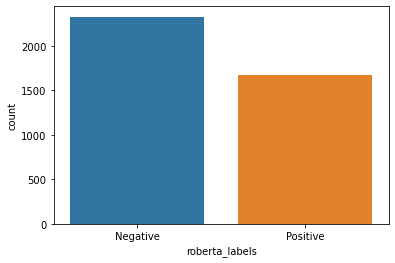

In [41]:
import seaborn as sns

sns.countplot(x='roberta_labels', data=data)

Positive Sentiments


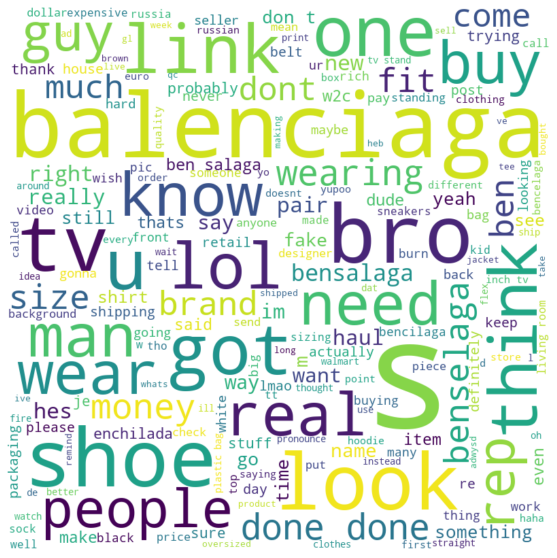

Negative Sentiments


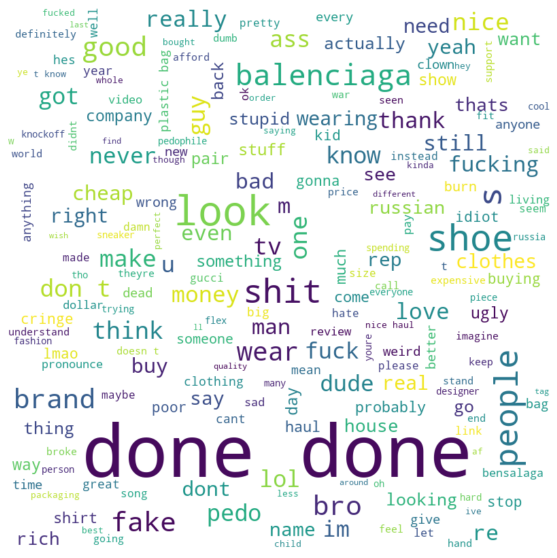

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['roberta_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['roberta_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [43]:
### Analysing sentiments through huggingface transformers

In [44]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [45]:
import spacy
import pandas as pd

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('sentencizer')

#Export sample comments from all the datasets
text = data['Comments'].tolist()[:100]
sentences = []
for doc in nlp.pipe(text):
    sentences.extend([sent.text for sent in doc.sents])

print(sentences)

['nice budget haulcrazy finds price', 'man de budget manace', 'lekkere haul man', 'oh wait way shoes taken', 'nice definitely copping', 'gucci shirt ain’t fantasy right', 'guy trying hunt hyper royal say fit big tts mean match size chart big also anyone qc thanks', 'material like gucci shirt', 'u 🐐', 'gucci shirt worn suit', 'w haul', 'ruin cheesy memes', 'found taobaoweidian links linked post httpsitemtaobaocomitemhtmid613721955387 httpsweidiancomitemhtmlitemid5296272167 httpsweidiancomitemhtmlitemid4379532528 httpsweidiancomitemhtmlitemid5397461920 httpsweidiancomitemhtmlitemid5819080014 httpsweidiancomitemhtmlitemid2796217969 httpsweidiancomitemhtmlitemid2726003760 httpsitemtaobaocomitemhtmid557811120075', 'httpsitemtaobaocomitemhtmid685853160278 httpsweidiancomitemhtmlitemid5630485855 httpsweidiancomitemhtmlitemid1995626114661601698829', 'httpsweidiancomitemhtmlitemid4358094831 httpsitemtaobaocomitemhtmid669035497036 httpsitemtaobaocomitemhtmid586700601137 bothttpswwwredditcomrfash

In [46]:
sent_pipeline(data['Comments'].tolist()[:100])

[{'label': 'POSITIVE', 'score': 0.999221920967102},
 {'label': 'NEGATIVE', 'score': 0.9174119830131531},
 {'label': 'NEGATIVE', 'score': 0.9931354522705078},
 {'label': 'NEGATIVE', 'score': 0.9905067086219788},
 {'label': 'POSITIVE', 'score': 0.9998051524162292},
 {'label': 'NEGATIVE', 'score': 0.9821919798851013},
 {'label': 'POSITIVE', 'score': 0.8273237943649292},
 {'label': 'NEGATIVE', 'score': 0.8797109723091125},
 {'label': 'NEGATIVE', 'score': 0.9492979645729065},
 {'label': 'NEGATIVE', 'score': 0.9207513332366943},
 {'label': 'POSITIVE', 'score': 0.9861241579055786},
 {'label': 'NEGATIVE', 'score': 0.9998125433921814},
 {'label': 'NEGATIVE', 'score': 0.9834838509559631},
 {'label': 'NEGATIVE', 'score': 0.6335565447807312},
 {'label': 'POSITIVE', 'score': 0.9858796000480652},
 {'label': 'POSITIVE', 'score': 0.9998613595962524},
 {'label': 'NEGATIVE', 'score': 0.9906875491142273},
 {'label': 'POSITIVE', 'score': 0.9730662703514099},
 {'label': 'POSITIVE', 'score': 0.7040984630584

In [47]:
sentiments = sent_pipeline(data['Comments'].tolist())
data['transformer_score'] = [s['score'] for s in sentiments]
data['transformer_labels'] = [s['label'] for s in sentiments]

In [48]:
data['transformer_labels']=data['transformer_labels'].str.title()

In [49]:
data.head(15)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos,roberta_labels,transformer_score,transformer_labels
0,nice budget haulcrazy finds price,"[nice, budget, haulcrazy, finds, price]","[(nice, JJ), (budget, NN), (haulcrazy, NN), (finds, VBZ), (price, NN)]",0.4215,1,Positive,0.021757,0.225048,Negative,0.999222,Positive
1,man de budget manace,"[man, de, budget, manace]","[(man, NN), (de, VBZ), (budget, NN), (manace, NN)]",0.0000,1,Positive,0.179297,0.716729,Positive,0.917412,Negative
2,lekkere haul man,"[lekkere, haul, man]","[(lekkere, RB), (haul, NN), (man, NN)]",0.0000,1,Positive,0.214380,0.686910,Positive,0.993135,Negative
3,oh wait way shoes taken,"[oh, wait, way, shoes, taken]","[(oh, UH), (wait, JJ), (way, NN), (shoes, NNS), (taken, VBN)]",0.0000,1,Positive,0.283471,0.686846,Positive,0.990507,Negative
4,nice definitely copping,"[nice, definitely, copping]","[(nice, JJ), (definitely, RB), (copping, VBG)]",0.6705,1,Positive,0.007919,0.258702,Negative,0.999805,Positive
5,gucci shirt ain’t fantasy right,"[gucci, shirt, ain, ’, t, fantasy, right]","[(gucci, NN), (shirt, NN), (ain, VBP), (’, JJ), (t, NN), (fantasy, NN), (right, NN)]",0.0000,1,Positive,0.668706,0.302505,Negative,0.982192,Negative
6,guy trying hunt hyper royal say fit big tts mean match size chart big also anyone qc thanks,"[guy, trying, hunt, hyper, royal, say, fit, big, tts, mean, match, size, chart, big, also, anyone, qc, thanks]","[(guy, NN), (trying, VBG), (hunt, NN), (hyper, JJ), (royal, NNS), (say, VBP), (fit, JJ), (big, JJ), (tts, NNS), (mean, VBP), (match, NN), (size, NN), (chart, NN), (big, JJ), (also, RB), (anyone, NN), (qc, JJ), (thanks, NNS)]",0.6597,1,Positive,0.012435,0.828479,Positive,0.827324,Positive
7,material like gucci shirt,"[material, like, gucci, shirt]","[(material, NN), (like, IN), (gucci, NN), (shirt, NN)]",0.3612,1,Positive,0.026333,0.626574,Positive,0.879711,Negative
8,u 🐐,"[u, 🐐]","[(u, JJ), (🐐, NN)]",0.0000,1,Positive,0.060894,0.521024,Positive,0.949298,Negative
9,gucci shirt worn suit,"[gucci, shirt, worn, suit]","[(gucci, NN), (shirt, NN), (worn, VBD), (suit, NN)]",-0.2960,0,Negative,0.027075,0.748562,Positive,0.920751,Negative


<AxesSubplot:xlabel='transformer_labels', ylabel='count'>

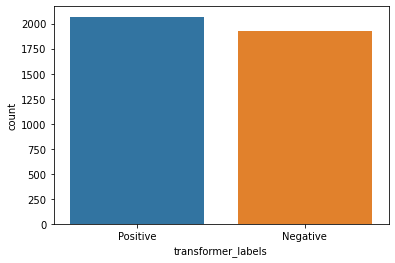

In [50]:
import seaborn as sns

sns.countplot(x='transformer_labels', data=data)

Positive Sentiments


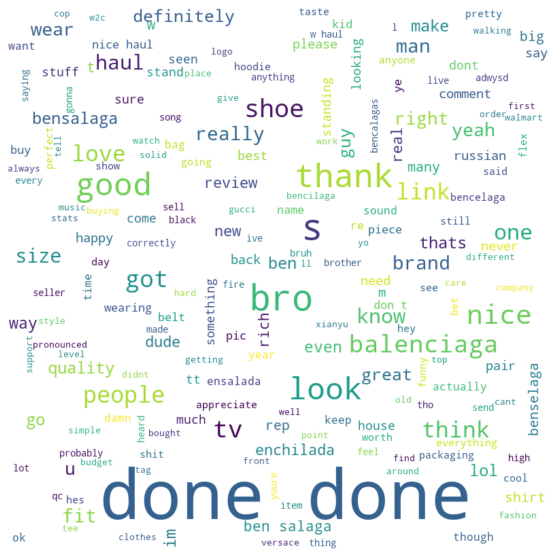

Negative Sentiments


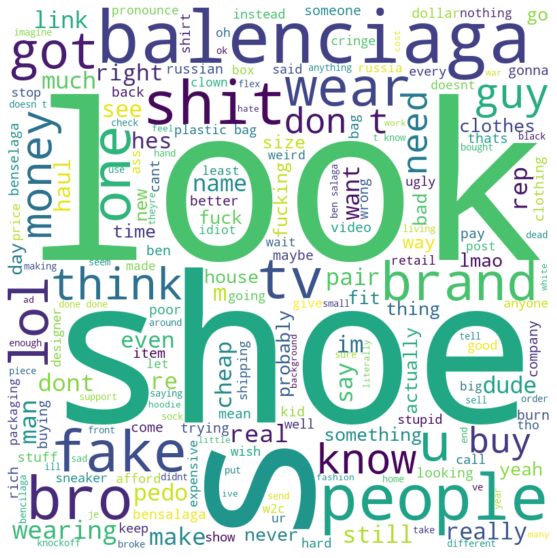

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['transformer_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['transformer_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [52]:
##### creating data frame of labels of the models used.

In [53]:
labels = data[['Comments','vader_labels','roberta_labels','transformer_labels']]

In [54]:
labels.head(10)

,Comments,vader_labels,roberta_labels,transformer_labels
0,nice budget haulcrazy finds price,Positive,Negative,Positive
1,man de budget manace,Positive,Positive,Negative
2,lekkere haul man,Positive,Positive,Negative
3,oh wait way shoes taken,Positive,Positive,Negative
4,nice definitely copping,Positive,Negative,Positive
5,gucci shirt ain’t fantasy right,Positive,Negative,Negative
6,guy trying hunt hyper royal say fit big tts mean match size chart big also anyone qc thanks,Positive,Positive,Positive
7,material like gucci shirt,Positive,Positive,Negative
8,u 🐐,Positive,Positive,Negative
9,gucci shirt worn suit,Negative,Positive,Negative


In [55]:
####Checking accuracy and F1 Score of the models used.

In [56]:
from sklearn.metrics import accuracy_score, f1_score


# Get the Vader labels
y_true = data['transformer_labels']
# Get the labels from approach 1
y_pred_approach_1 = data['vader_labels']
y_pred_approach_2 = data['roberta_labels']
# Calculate the accuracy score for each approach
acc_approach_1 = accuracy_score(y_true, y_pred_approach_1)
acc_approach_2 = accuracy_score(y_true, y_pred_approach_2)
# Calculate the F1 score for each approach
f1_approach_1 = f1_score(y_true, y_pred_approach_1, average='weighted')
f1_approach_2 = f1_score(y_true, y_pred_approach_2, average='weighted')
# Print the results
 
print("Accuracy for vader_labels : {:.4f}".format(acc_approach_1))
print("F1 score for vader_labels: {:.4f}".format(f1_approach_1))
print("Accuracy for roberta_labels : {:.4f}".format(acc_approach_2))
print("F1 score for roberta_labels: {:.4f}".format(f1_approach_2))

Accuracy for vader_labels : 0.6550
F1 score for vader_labels: 0.6120
Accuracy for roberta_labels : 0.3942
F1 score for roberta_labels: 0.3903


In [57]:
####comparison of the results of the scores of models through plots

In [58]:
import matplotlib.pyplot as plt
vader_f1 = [f1_approach_1,]
roberta_f1 = [f1_approach_2]
vader_acc = [acc_approach_1]
roberta_acc = [acc_approach_2]

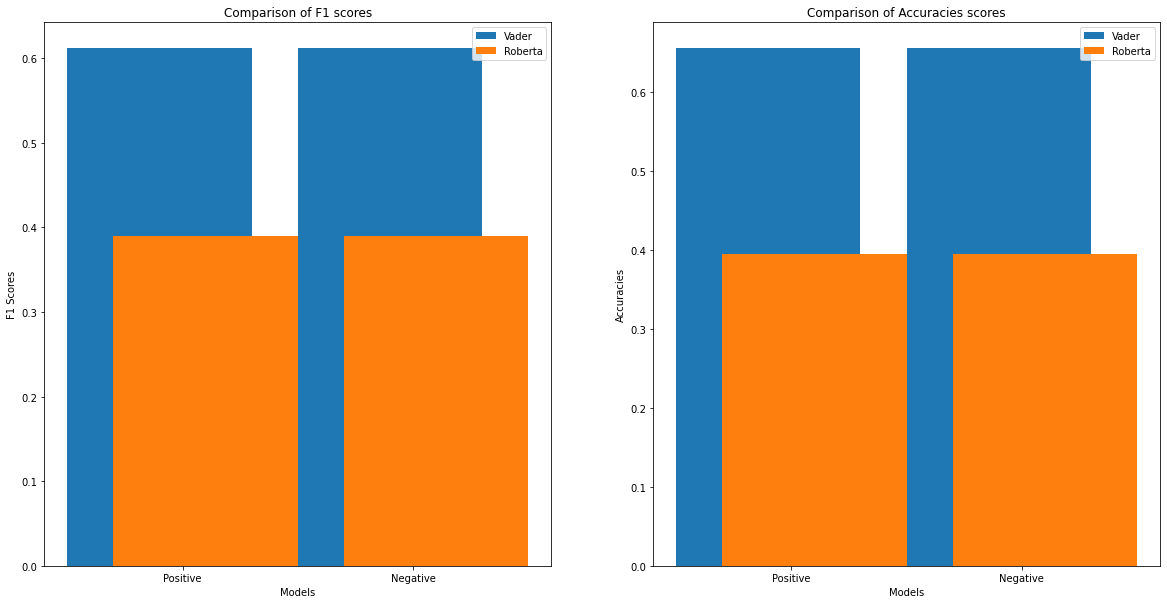

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].bar([0, 1], vader_f1, label='Vader')
axs[0].bar([0.2, 1.2], roberta_f1, label='Roberta')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('F1 Scores')
axs[0].set_xticks([0.1, 1.1])
axs[0].set_xticklabels(['Positive', 'Negative'])
axs[0].set_title('Comparison of F1 scores')
axs[0].legend()
# Plot accuracies in the second subplot
axs[1].bar([0, 1], vader_acc, label='Vader')
axs[1].bar([0.2, 1.2], roberta_acc, label='Roberta')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Accuracies')
axs[1].set_xticks([0.1, 1.1])
axs[1].set_xticklabels(['Positive', 'Negative'])
axs[1].set_title('Comparison of Accuracies scores')
axs[1].legend()

In [60]:
###Conclusion
###Based on the F1 scores, the Vader model has the highest F1 score of 0.6120,outperforming  Roberta's f1 score of  0.3903, so to conclude , Vader model predicted sentiments much accurately than Roberta model for a dataset of this type and size.


